# Libraries

In [27]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import Data

In [2]:
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\iamsouravbanerjee\customer-shopping-trends-dataset\versions\2


In [3]:
df = pd.read_csv('shopping_trends_updated.csv')

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [17]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_12560\3873251393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
C:\Users\DELL\AppData\Local\Temp\ipykernel_12560\3873251393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
C:\Users\DELL\AppData\Local\Temp\ipykernel_12560\3873251393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
C:\U

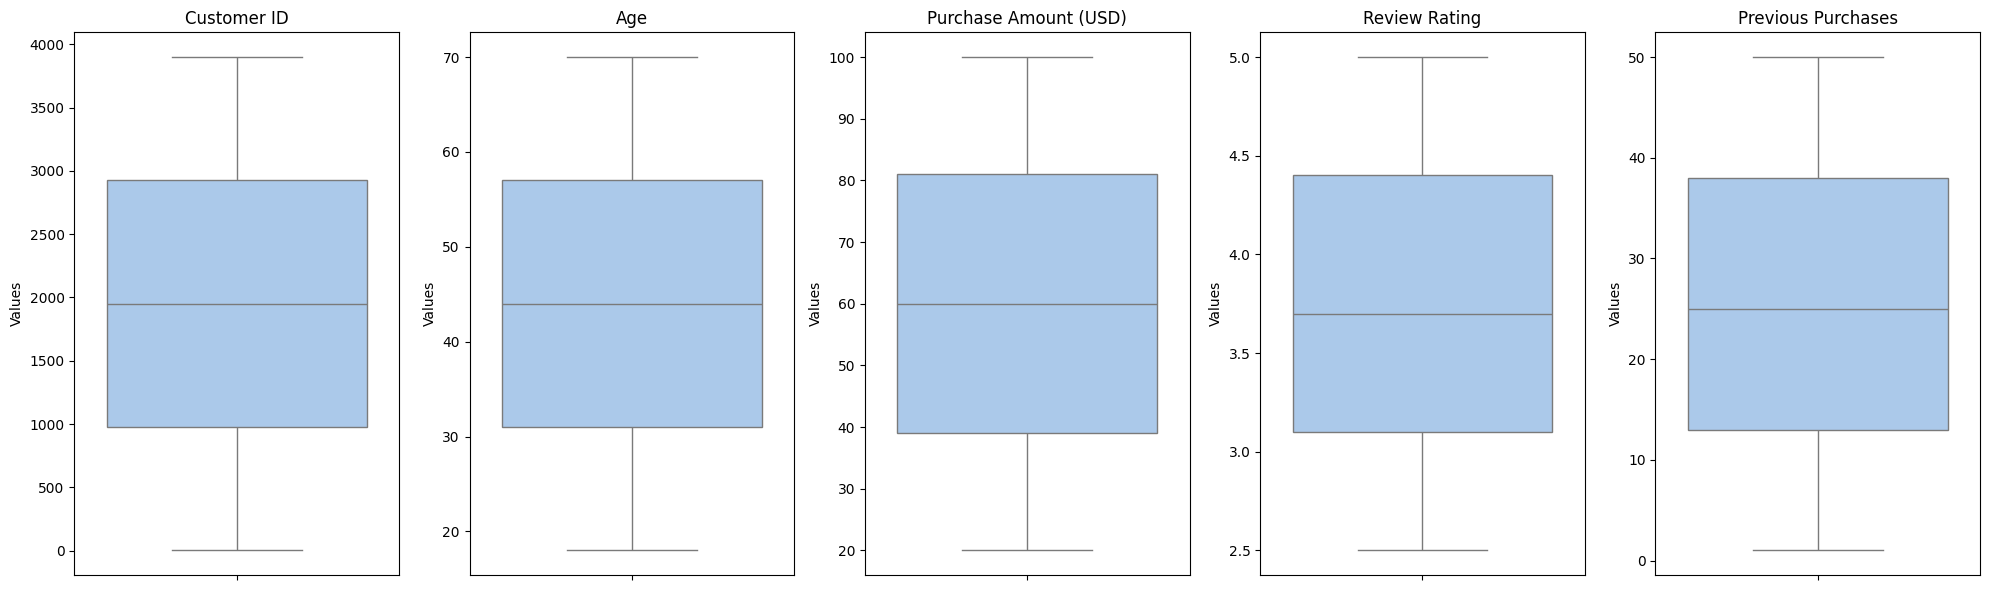

In [25]:
#Checking for outliers

# Filter numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot vertical boxplots in a horizontal alignment
plt.figure(figsize=(len(numerical_columns) * 4, 6))  # Adjust width dynamically
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)  # Subplots in a single row
    sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
    plt.title(f'{column}', fontsize=12)
    plt.ylabel('Values')
    plt.xlabel('')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Vizualizing Demographics

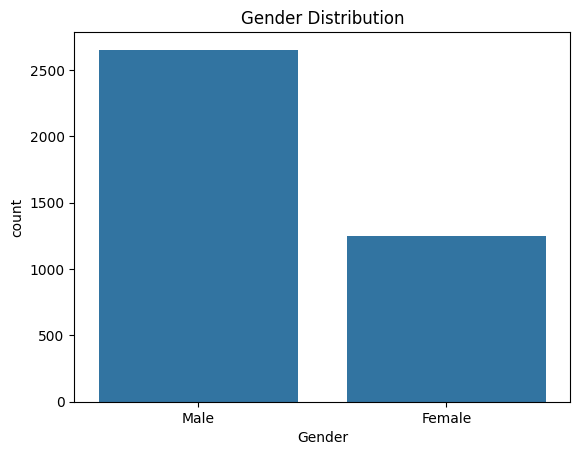

In [7]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

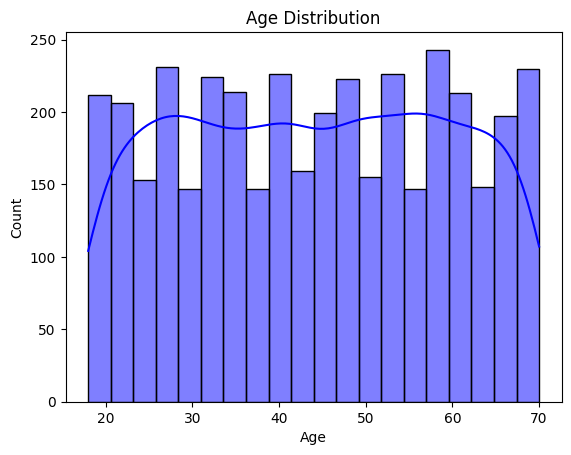

In [8]:
# Age distribution
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### Spending Behavior Analysis

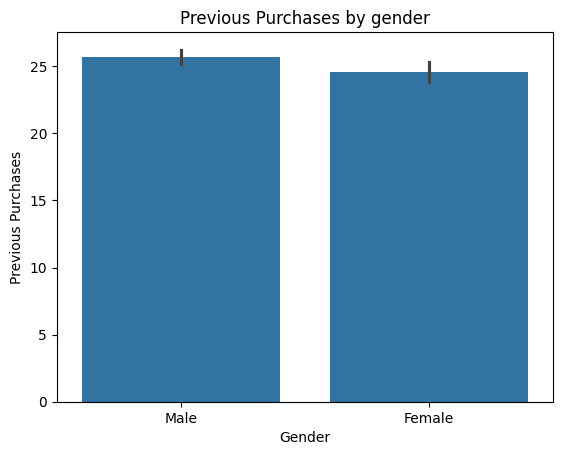

In [15]:
sns.barplot(x='Gender', y='Previous Purchases', data=df)
plt.title('Previous Purchases by gender')
plt.show()

### Purchase Patterns

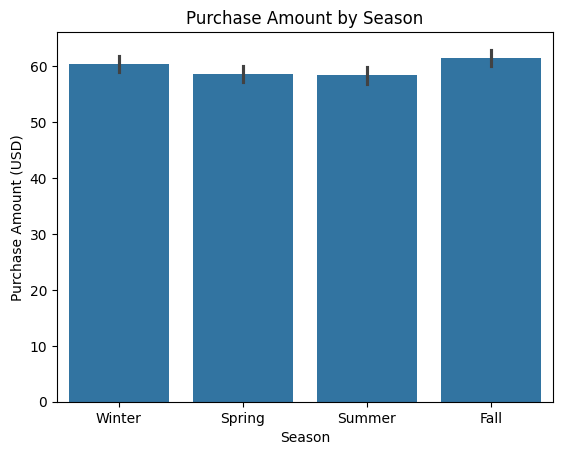

In [10]:
sns.barplot(x='Season', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Season')
plt.show()

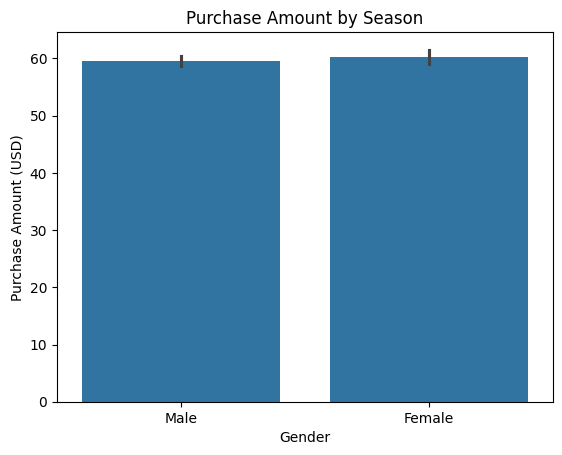

In [ ]:
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Gender')
plt.show()

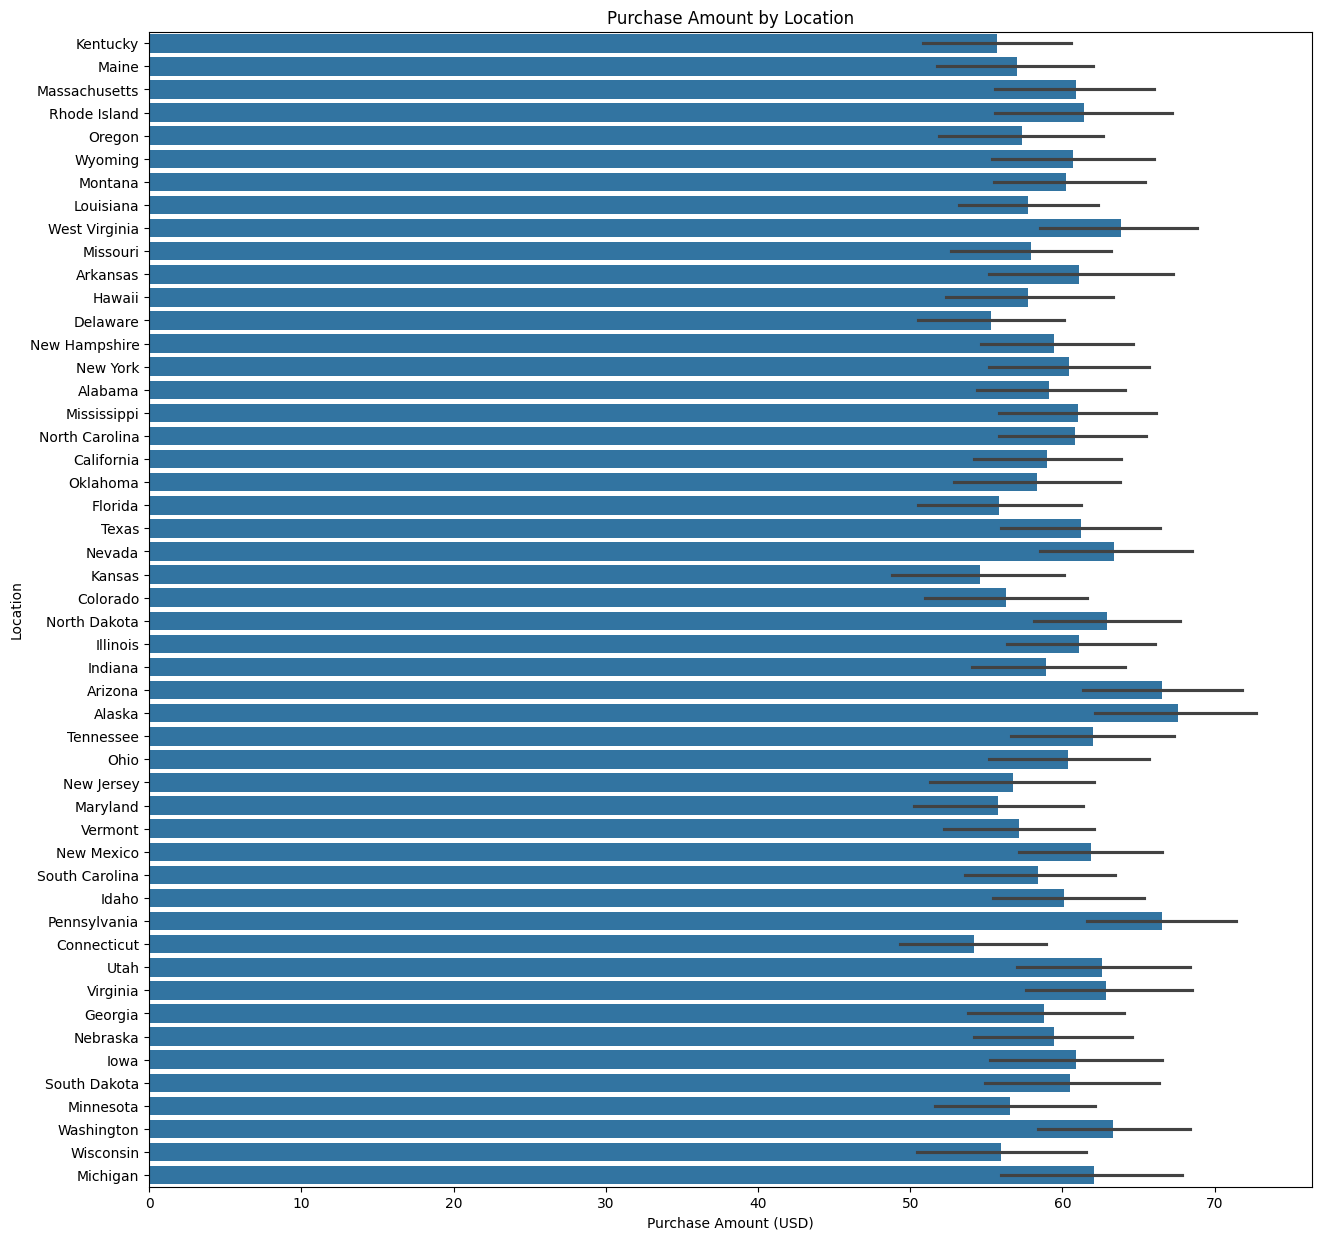

In [12]:
plt.figure(figsize=(15, 15))
sns.barplot(x='Purchase Amount (USD)', y='Location', data=df)
plt.title('Purchase Amount by Location')
plt.show()

### Product Analysis

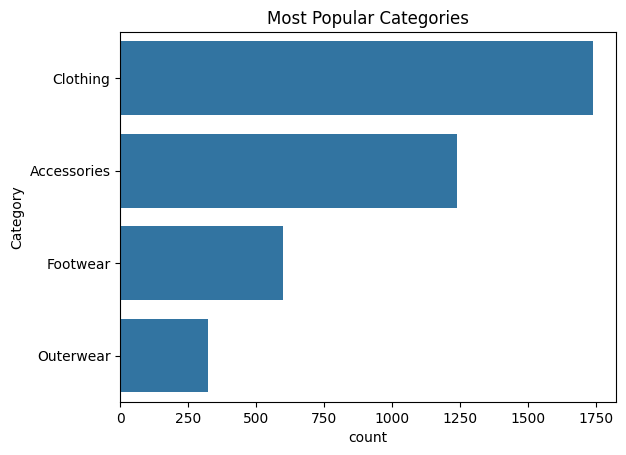

In [13]:
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Most Popular Categories')
plt.show()

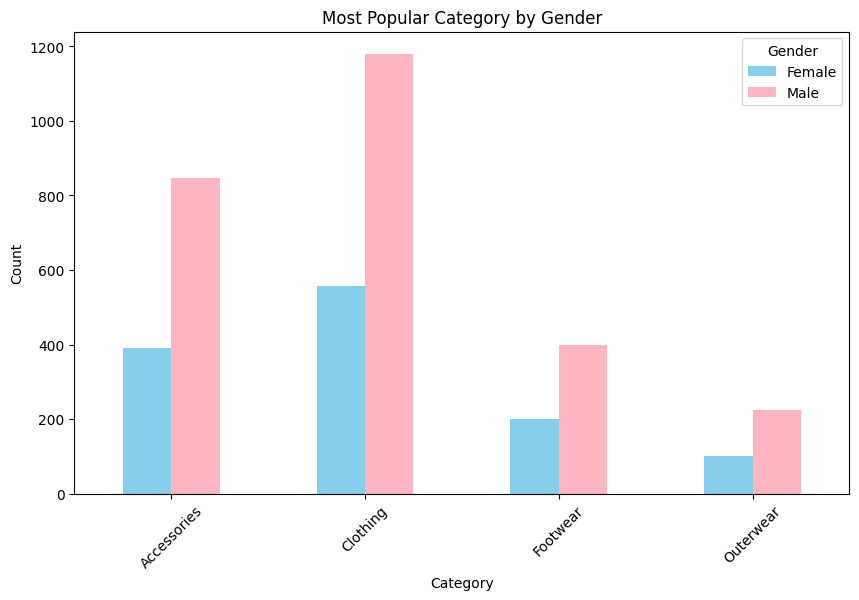

In [16]:
category_gender_counts = df.groupby(['Gender', 'Category']).size().reset_index(name='Count')

# Pivot the table for easier plotting
pivot_table = category_gender_counts.pivot(index='Category', columns='Gender', values='Count').fillna(0)

# Plot using Seaborn
pivot_table.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightpink'])
plt.title('Most Popular Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Preprocessing

In [26]:
# Standardizing numerical columns
scaler = StandardScaler()
df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']] = scaler.fit_transform(df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']])

In [29]:
unique_values = df['Frequency of Purchases'].unique().tolist()
print(unique_values)

['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly', 'Every 3 Months']


In [30]:
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace('Every 3 Months', 'Quarterly')
unique_values = df['Frequency of Purchases'].unique().tolist()
print(unique_values)

['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly']


In [ ]:
# encoding categorical columns

# one hot encoding non-ordinal columns
pd.get_dummies(df, columns=['Gender', 'Season', 'Category'], drop_first=True)

# label encoding ordinal columns
le = LabelEncoder()
df['Subscription status'] = le.fit_transform(df['Subscription status'])

df['Discount Applied'] = le.fit_transform(df['Discount Applied'])

df['Promo Code Used'] = le.fit_transform(df['Promo Code Used'])